In [1]:
import pandas as pd
df=pd.read_excel("InsuranceDatasetIndia.xlsx")


In [79]:
df.head()

,S.NO,Insurance Name,Age,Profile,Government/Private,Health Condition,Coverage
0,0,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,500000
1,1,Optima Restore by HDFC ERGO,18-65,Self,Private,Others,500000
2,2,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,1000000
3,3,Optima Restore by HDFC ERGO,18-65,Self,Private,Others,1000000
4,4,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,2000000


In [80]:
df.drop(columns=['S.NO'],inplace=True)

In [81]:
df.shape


(1847, 6)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Insurance Name      1847 non-null   object
 1   Age                 1847 non-null   object
 2   Profile             1847 non-null   object
 3   Government/Private  1847 non-null   object
 4   Health Condition    1847 non-null   object
 5   Coverage            1847 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 86.7+ KB


In [83]:
df.describe()

,Coverage
count,1.847000e+03
mean,4.606619e+06
std,6.933889e+06
min,7.500000e+04
25%,5.000000e+05
50%,2.000000e+06
75%,5.000000e+06
max,6.000000e+07


In [84]:
df['Health Condition'].unique()

array(['Others', 'Diabetes', 'Hypertension'], dtype=object)

In [85]:
sorted(df['Coverage'].unique())

[75000,
 100000,
 200000,
 300000,
 500000,
 1000000,
 2000000,
 3000000,
 5000000,
 10000000,
 20000000,
 60000000]

In [86]:
sorted(df['Age'].unique())


['18-100',
 '18-40',
 '18-45',
 '18-50',
 '18-55',
 '18-60',
 '18-65',
 '18-75',
 '418-75',
 '61-75',
 '65-75']

In [87]:
df['Government/Private'].unique()

array(['Private', 'private', 'Government'], dtype=object)

In [88]:
df['Government/Private']=df['Government/Private'].str.replace("private",'Private')

In [89]:
def get_insurance_providers():
    t=list(df['Insurance Name'])
    insuranceProvider=set()
    for i in t:
        insuranceProvider.add(i.split('by')[-1].strip())
    print(sorted(insuranceProvider))
get_insurance_providers()

['Aam Aadmi Bhima Yojana', 'Adiitya Birla', 'Aditya BIrla', 'Aditya Birla', 'Amma Health Insurance', 'Arogya Sanjeevani', 'Avtiv One By Aditya Birla', 'Awaz Health Insurance Scheme', 'Ayushman Bharat Prandhan Mantri Jan Arogya Yojana', 'Bajaj Allianz', 'Bhamasha Swastha Bhima Yojana', 'Care Freedom for Diabetes', 'Care Global with Global Coverage including USA', 'Care Health', "Chief Minister's Comprehensive Health Insurance Scheme", 'Cholamandalam', 'Diabetes Safe Plan-B', 'HDFC ERGO', 'Health ReAssure (Direct)', 'Iffco Tokio', 'Kerala Government', 'New Health Insurance Scheme', 'New India Assurance', 'Niva Bupa', 'Raheja QBE', 'Rayal Sundharam', 'Reliance', 'SBI', 'Star', 'TataAig', 'Universal Sompo']


In [90]:
df['Insurance Name']=df['Insurance Name'].str.replace("Adiitya Birla","Aditya Birla")
df['Insurance Name']=df['Insurance Name'].str.replace("Aditya BIrla","Aditya Birla")
get_insurance_providers()


['Aam Aadmi Bhima Yojana', 'Aditya Birla', 'Amma Health Insurance', 'Arogya Sanjeevani', 'Avtiv One By Aditya Birla', 'Awaz Health Insurance Scheme', 'Ayushman Bharat Prandhan Mantri Jan Arogya Yojana', 'Bajaj Allianz', 'Bhamasha Swastha Bhima Yojana', 'Care Freedom for Diabetes', 'Care Global with Global Coverage including USA', 'Care Health', "Chief Minister's Comprehensive Health Insurance Scheme", 'Cholamandalam', 'Diabetes Safe Plan-B', 'HDFC ERGO', 'Health ReAssure (Direct)', 'Iffco Tokio', 'Kerala Government', 'New Health Insurance Scheme', 'New India Assurance', 'Niva Bupa', 'Raheja QBE', 'Rayal Sundharam', 'Reliance', 'SBI', 'Star', 'TataAig', 'Universal Sompo']


In [91]:
df[df['Insurance Name'].str.startswith('Health ReAssure (Direct)')]['Insurance Name'].unique()

array(['Health ReAssure (Direct) by Niva Bupa',
       'Health ReAssure (Direct)'], dtype=object)

In [92]:
df['Insurance Name']=df['Insurance Name'].str.replace("Health ReAssure (Direct)","Health ReAssure (Direct) by Niva Bupa")

In [93]:
df['Insurance Name']=df['Insurance Name'].str.replace("Avtiv One By Aditya Birla",'Activ One by Aditya Birla')

In [94]:
df[df['Insurance Name'].str.startswith('Care Freedom for Diabetes')]['Insurance Name'].unique()

array(['Care Freedom for Diabetes',
       'Care Freedom for Diabetes by Care Health'], dtype=object)

In [95]:
df['Insurance Name']=df['Insurance Name'].str.replace("Care Freedom for Diabetes",'Care Freedom for Diabetes by Care Health')

In [41]:
df[df['Insurance Name'].str.startswith('Care Global with Global Coverage including USA')]['Insurance Name'].unique()

array(['Care Global with Global Coverage including USA'], dtype=object)

In [42]:
df['Insurance Name']=df['Insurance Name'].str.replace("Care Global with Global Coverage including USA",'Care Global with Global Coverage including USA by Care Health')

In [43]:
df[df['Insurance Name'].str.startswith('Diabetes Safe Plan-B')]['Insurance Name'].unique()

array(['Diabetes Safe Plan-B by Star', 'Diabetes Safe Plan-B'],
      dtype=object)

In [44]:
df['Insurance Name']=df['Insurance Name'].str.replace("Diabetes Safe Plan-B",'Diabetes Safe Plan-B by Star')

In [45]:
get_insurance_providers()

['Aam Aadmi Bhima Yojana', 'Aditya Birla', 'Amma Health Insurance', 'Arogya Sanjeevani', 'Awaz Health Insurance Scheme', 'Ayushman Bharat Prandhan Mantri Jan Arogya Yojana', 'Bajaj Allianz', 'Bhamasha Swastha Bhima Yojana', 'Care Health', "Chief Minister's Comprehensive Health Insurance Scheme", 'Cholamandalam', 'HDFC ERGO', 'Iffco Tokio', 'Kerala Government', 'New Health Insurance Scheme', 'New India Assurance', 'Niva Bupa', 'Raheja QBE', 'Rayal Sundharam', 'Reliance', 'SBI', 'Star', 'TataAig', 'Universal Sompo']


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

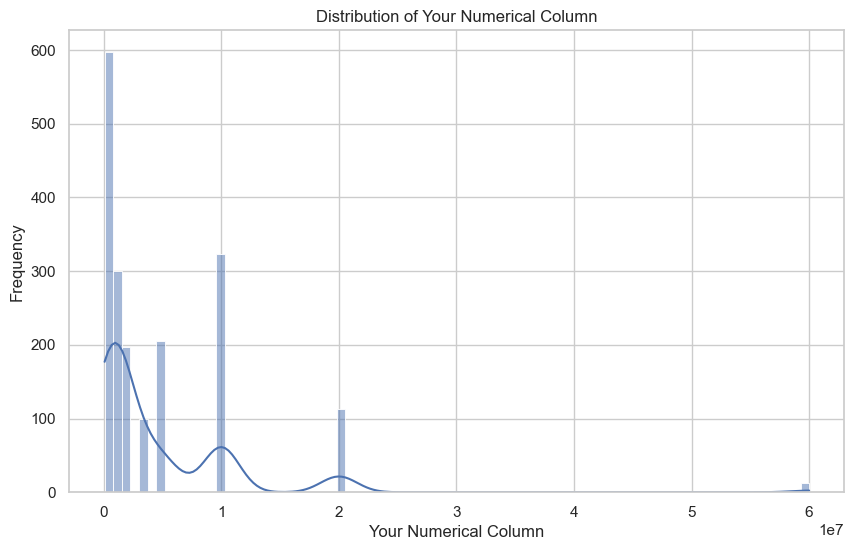

In [75]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Coverage'], kde=True)
plt.title('Distribution of Your Numerical Column')
plt.xlabel('Your Numerical Column')
plt.ylabel('Frequency')
plt.show()

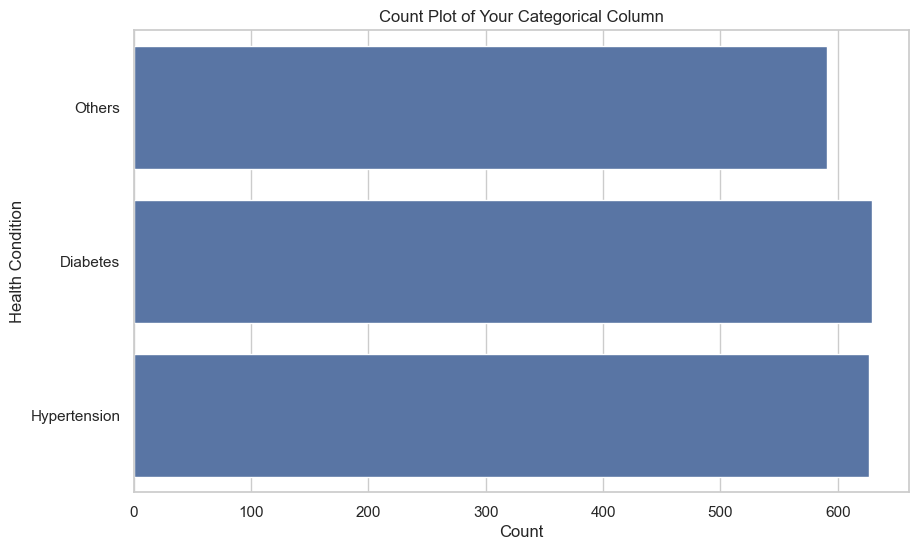

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Health Condition'], data=df)
plt.title('Count Plot of Your Categorical Column')
plt.xlabel('Count')
plt.ylabel('Health Condition')
plt.show()

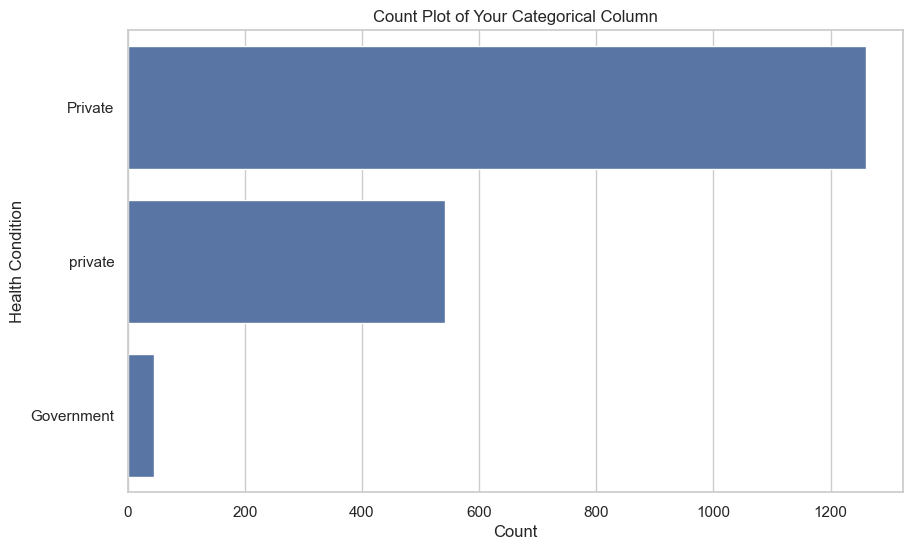

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Government/Private'], data=df)
plt.title('Count Plot of Your Categorical Column')
plt.xlabel('Count')
plt.ylabel('Health Condition')
plt.show()

In [46]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [47]:
one_enc=OneHotEncoder()
stdscaler=StandardScaler()


In [50]:
#df.drop(columns=['S.NO'],inplace=True)

In [51]:
requiredCat=df.columns[1:-1]
insurance_df=df[requiredCat]
insurance_df.head()

,Age,Profile,Government/Private,Health Condition
0,18-75,Self,Private,Others
1,18-65,Self,Private,Others
2,18-75,Self,Private,Others
3,18-65,Self,Private,Others
4,18-75,Self,Private,Others


In [52]:
xenc=one_enc.fit_transform(insurance_df.values)

In [53]:
xenc.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [54]:
insuranceDf=pd.DataFrame(xenc.toarray(),columns=one_enc.get_feature_names_out(requiredCat))

In [55]:
insuranceDf.head()

,Age_18-100,Age_18-40,Age_18-45,Age_18-50,Age_18-55,Age_18-60,Age_18-65,Age_18-75,Age_418-75,Age_61-75,...,Profile_Self,Profile_Self and Spouse,Profile_Self and Spouse and 1Kid,Profile_Self and Spouse and 2Kids,Profile_Senior Citizen,Government/Private_Government,Government/Private_Private,Health Condition_Diabetes,Health Condition_Hypertension,Health Condition_Others
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
insuranceDf['Coverage']=stdscaler.fit_transform(df[['Coverage']].values)

In [57]:
from sklearn.neighbors import NearestNeighbors

knn=NearestNeighbors(algorithm='brute',metric='cosine')
knn.fit(insuranceDf)

NearestNeighbors(algorithm='brute', metric='cosine')

In [58]:
def get_recommendation(user_profile,df,one_enc,stdscaler,knn):
    user_profile_values = [user_profile[feature] for feature in requiredCat]
    user_encoded = one_enc.transform([user_profile_values])
    user_df = pd.DataFrame(user_encoded.toarray(), columns=one_enc.get_feature_names_out(requiredCat))
    user_df['Coverage'] = stdscaler.transform([[user_profile['Coverage']]])

    distances, indices = knn.kneighbors(user_df.values)
    print(distances)
    recommended_plans = df.iloc[indices[0]]
    return recommended_plans


In [59]:
from sklearn.neighbors import NearestNeighbors

knn=NearestNeighbors(algorithm='brute',metric='cosine')
knn.fit(insuranceDf.values)

user_profile = {
    'Age': '18-75',
    'Profile': 'Self',
    'Government/Private': 'Private',
    'Health Condition': 'Diabetes',
    'Coverage': 5000000
}
get_recommendation(user_profile,df,one_enc,stdscaler,knn)

[[1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
  1.03122541e-02]]


,Insurance Name,Age,Profile,Government/Private,Health Condition,Coverage
652,Activ One VYLT(Diabetes) by Aditya Birla,18-75,Self,Private,Diabetes,5000000
658,Activ Health Platinum Essential by Aditya Birla,18-75,Self,Private,Diabetes,5000000
1613,Next Gen by Rayal Sundharam,18-75,Self,Private,Diabetes,5000000
657,Activ Health Platinum Enhanced by Aditya Birla,18-75,Self,Private,Diabetes,5000000
599,Activ Health Platinum Enhanced by Aditya Birla,18-75,Self,Private,Diabetes,3000000


In [2]:
df=pd.read_csv("HealthInsuranceIndia.csv")

In [3]:
df.head()

,Unnamed: 0,S.NO,Insurance Name,Age,Profile,Government/Private,Health Condition,Coverage
0,0,0,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,500000
1,1,1,Optima Restore by HDFC ERGO,18-65,Self,Private,Others,500000
2,2,2,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,1000000
3,3,3,Optima Restore by HDFC ERGO,18-65,Self,Private,Others,1000000
4,4,4,Optima Secure by HDFC ERGO,18-75,Self,Private,Others,2000000
